# Redo the HelloWorld Example

This file is trying to use technique to detect the handwritten data(mnist dataset).

This part includes:
* CNN
* data augmentation
* drop out layer


## Part I

Build the convnet, using VGG structure

In [30]:
from keras import models
from keras import layers

#making the neural network>>>
# The convnet part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#connect to the original part model
model.add(layers.Flatten())
#drop out
model.add(layers.Dropout(0.5))
# The original part
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
#making the neural network<<<

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)              

## Part II

Perprocess the data, using the data augmentation technique.


In [41]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import os, shutil

#data loading
DatasetDir = "/home/chen/LiChiChang/2020SpringThesis/dataset/mnist/mnist" #pls indicate your path
SmallDataDir = "/home/chen/LiChiChang/2020SpringThesis/dataset/mnist/shrink" #pls indicate your path

trainDir = os.path.join(SmallDataDir, 'train')
validationDir = os.path.join(SmallDataDir, 'validation')

if os.path.exists(SmallDataDir):
    shutil.rmtree(SmallDataDir)

os.mkdir(SmallDataDir)
os.mkdir(validationDir)
os.mkdir(trainDir)

def loadData(src, dst, format, start, end):
    dataList = []
    for i in range(start, end):
        dataList.append(format.format(i))

    for data in dataList:
        for j in range(10):
            if(not os.path.exists(os.path.join(dst, str(j)))):
                os.mkdir(os.path.join(dst, str(j)))
            srcData = os.path.join(os.path.join(src, str(j)), data)
            dstData = os.path.join(os.path.join(dst, str(j)),data)
            shutil.copyfile(srcData, dstData)

loadData(DatasetDir, trainDir, '{}.jpg', 0, 5299)
loadData(DatasetDir, validationDir, '{}.jpg', 5300, 6300)

#augmentation function
DataGen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=False,)

trainGenerator = DataGen.flow_from_directory(trainDir, batch_size=100,target_size=(28,28),color_mode='grayscale',class_mode='categorical')
validationGenerator = DataGen.flow_from_directory(validationDir, batch_size=100,target_size=(28,28),color_mode='grayscale', class_mode='categorical')

history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs=30, validation_data=validationGenerator, validation_steps=50)


Found 52990 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Epoch 1/30
100/100 [==============================] - 8s 78ms/step - loss: 2.0444 - acc: 0.2652 - val_loss: 1.6950 - val_acc: 0.4848
Epoch 2/30
100/100 [==============================] - 7s 73ms/step - loss: 1.4968 - acc: 0.4819 - val_loss: 1.1389 - val_acc: 0.6078
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 1.1969 - acc: 0.6003 - val_loss: 1.0059 - val_acc: 0.7242
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.9929 - acc: 0.6706 - val_loss: 0.6106 - val_acc: 0.7812
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.8645 - acc: 0.7177 - val_loss: 0.7899 - val_acc: 0.8162
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.7402 - acc: 0.7603 - val_loss: 0.4003 - val_acc: 0.8486
Epoch 7/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6836 - acc: 0.7813 - val_loss: 0.6663

10000/10000 [==============================] - 1s 67us/step
test_acc: 0.9822999835014343


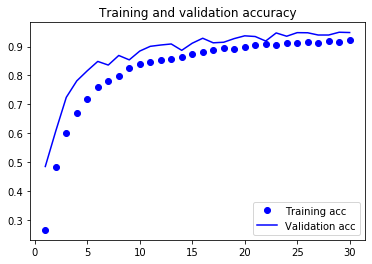

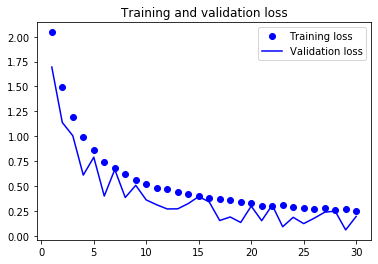

In [42]:
import matplotlib.pyplot as plt

#testing>>>
test_loss, test_acc = model.evaluate(test_images, test_labels)
#testing<<<

print('test_acc:', test_acc)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

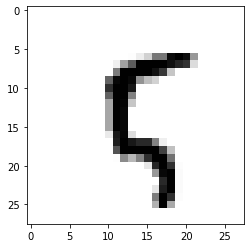

[[2.2940878e-05 2.6602049e-08 6.8198960e-07 1.0342025e-04 5.3100312e-06
  9.9790251e-01 7.2969915e-04 5.4327412e-08 4.4823994e-04 7.8712986e-04]]
[5]


In [45]:
import matplotlib.pyplot as plt

digit = train_images[100]
digitR = digit.reshape(28,28)
plt.imshow(digitR, cmap=plt.cm.get_cmap('binary'))
plt.show()
digitR = digit.reshape(1,28,28,1)

print(model.predict(np.array(digitR)))
print(model.predict_classes(np.array([digit])))